In [144]:
%matplotlib inline
#import matplotlib
#matplotlib.use('tkAgg')
import matplotlib.pyplot as plt
import sys
import numpy as np
import scipy as sp
import scipy.optimize as spo

In [177]:
cap = 1.5 * 10**9

In [178]:
s = np.log(0.6) / 10**8
s

-5.108256237659907e-09

In [202]:
A = 10**8
B = cap
C = 0.4

def f(s):
    return (np.exp(s * A) - 1) / (np.exp(s * B) - 1) - C

def f_prime(s):
    return (A * np.exp(s * A) * (np.exp(s * 10**8) - 1) - B * np.exp(s * B) * (np.exp(s * A) - 1) ) / (np.exp(s * 10**8) - 1)**2

s = spo.newton(f, s, fprime=f_prime, tol=10**-8)
s

-5.1052499455265e-09

In [196]:
def issuance(cummulative_euros):
    return np.exp(s * cummulative_euros)

def issued(cummulative_euros):
    return 1 / s * (np.exp(s * cummulative_euros) - 1)

def frac(cummulative_euros):
    return issued(cummulative_euros) / issued(cap)

In [197]:
issuance(np.array([0.0, 10**8, cap]))

array([  1.00000000e+00,   6.00174629e-01,   4.72241873e-04])

In [198]:
issued(np.array([0.0, 10**8, cap]))

array([ -0.00000000e+00,   7.83150363e+07,   1.95780604e+08])

In [199]:
frac(np.array([0.0, 10**8, cap]))

array([-0.        ,  0.40001427,  1.        ])

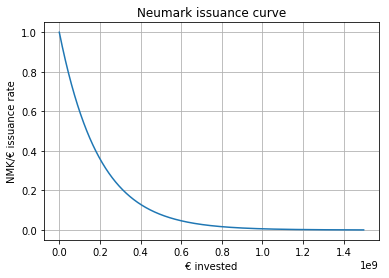

In [200]:
e = np.arange(0.0, cap, cap / 10**3)
n = issuance(e)
plt.plot(e, n)

plt.xlabel('€ invested')
plt.ylabel('NMK/€ issuance rate')
plt.title('Neumark issuance curve')
plt.grid(True)
plt.savefig("curve.png")
plt.show()

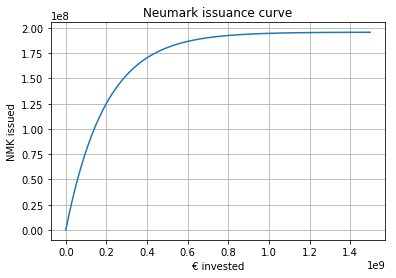

In [201]:
e = np.arange(0.0, cap, cap / 10**3)
n = issued(e)
plt.plot(e, n)

plt.xlabel('€ invested')
plt.ylabel('NMK issued')
plt.title('Neumark issuance curve')
plt.grid(True)
plt.savefig("curve.png")
plt.show()